In [1]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [2]:
 # Set path to CSV and read in CSV
csv_path = Path("DATA/LTC/LTC_DATA.csv")
ltc_df=pd.read_csv(csv_path)

In [3]:
 # Set index as Date
ltc_df = ltc_df.set_index(pd.to_datetime(ltc_df["Date"], infer_datetime_format=True))

# Display sample data
ltc_df.head(10)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,,
2018-05-31,LTC,2018-05-31,117.475053,118.974662,119.628628,117.006761
2018-06-01,LTC,2018-06-01,119.934676,118.307052,120.452653,117.390816
2018-06-02,LTC,2018-06-02,123.222694,120.171853,124.229394,118.542360
2018-06-03,LTC,2018-06-03,125.365456,123.500674,127.920242,122.112908
2018-06-04,LTC,2018-06-04,119.522003,124.869538,126.883812,118.303633
2018-06-05,LTC,2018-06-05,122.078669,119.522007,122.432580,115.990032
2018-06-06,LTC,2018-06-06,121.484850,121.990000,122.640000,118.490000
2018-06-07,LTC,2018-06-07,121.490219,121.484850,123.594169,119.646156
2018-06-08,LTC,2018-06-08,120.069032,121.498743,121.991948,118.335104


In [4]:
#check for na
ltc_df.isnull().values.any()

False

In [5]:
# Set the random seed to (2)
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [6]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [7]:
# Define the window size
window_size = 9

# Set the index of the feature and target columns
feature_column = 2
target_column = 2

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(ltc_df, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[117.47505337 119.93467627 123.22269359 125.36545647 119.52200328
  122.0786686  121.48485    121.49021883 120.06903171]
 [119.93467627 123.22269359 125.36545647 119.52200328 122.0786686
  121.48485    121.49021883 120.06903171 117.3717    ]
 [123.22269359 125.36545647 119.52200328 122.0786686  121.48485
  121.49021883 120.06903171 117.3717     106.85      ]] 

y sample values:
[[117.3717  ]
 [106.85    ]
 [105.858313]]


In [8]:
 # Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [9]:
 # Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [10]:
 # Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.262713  ]
  [0.26954282]
  [0.27867291]
  [0.28462288]
  [0.26839692]
  [0.27549621]
  [0.27384731]
  [0.27386222]
  [0.2699159 ]]

 [[0.26954282]
  [0.27867291]
  [0.28462288]
  [0.26839692]
  [0.27549621]
  [0.27384731]
  [0.27386222]
  [0.2699159 ]
  [0.26242601]]

 [[0.27867291]
  [0.28462288]
  [0.26839692]
  [0.27549621]
  [0.27384731]
  [0.27386222]
  [0.2699159 ]
  [0.26242601]
  [0.23320961]]] 

X_test sample values:
[[[0.09413279]
  [0.09833481]
  [0.08601734]
  [0.08750659]
  [0.09543185]
  [0.0946688 ]
  [0.10390092]
  [0.1093047 ]
  [0.12558417]]

 [[0.09833481]
  [0.08601734]
  [0.08750659]
  [0.09543185]
  [0.0946688 ]
  [0.10390092]
  [0.1093047 ]
  [0.12558417]
  [0.12188604]]

 [[0.08601734]
  [0.08750659]
  [0.09543185]
  [0.0946688 ]
  [0.10390092]
  [0.1093047 ]
  [0.12558417]
  [0.12188604]
  [0.10742824]]]


In [11]:
 # Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [12]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 9
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [13]:
 # Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [14]:
# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 9, 9)              396       
_________________________________________________________________
dropout (Dropout)            (None, 9, 9)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 9)              684       
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 9)                 684       
_________________________________________________________________
dropout_2 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [15]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=90, verbose=1)

Epoch 1/10
9/9 [==============================] - 7s 16ms/step - loss: 0.0086
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 5/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 8/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 9/10
9/9 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 10/10
9/9 [==============================] - 0s 10ms/step - loss: 0.0018


In [16]:
 # Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [17]:
predicted.shape

(344, 1)

In [18]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [19]:
 # Create a DataFrame of Real and Predicted values
ltc_eval = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = ltc_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
ltc_eval.head()

,Actual,Predicted
Date,,
2020-08-18,66.759048,57.985764
2020-08-19,61.552362,58.345837
2020-08-20,62.429652,58.682827
2020-08-21,59.938543,59.495171
2020-08-22,60.281703,60.275616


<AxesSubplot:title={'center':'Actual Vs. Predicted LTC Prices'}, xlabel='Date'>

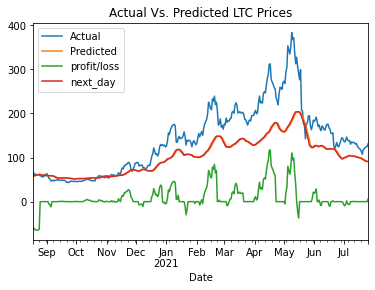

In [30]:
 # Plot the real vs predicted prices as a line chart
ltc_eval.plot(title="Actual Vs. Predicted LTC Prices")

In [21]:
#seprate actual and pred
Pred= ltc_eval['Actual']
act= ltc_eval['Predicted']

#model eval
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(act, Pred))
print(math.sqrt(mean_squared_error(act, Pred)))
print(mean_absolute_error(act, Pred))

3146.518386039765
56.093835544021815
40.27475898071486


In [22]:
#create buy and sell signals 
#calculate profit and loss

#create 'profit/loss' column to track trade metrics
ltc_eval['profit/loss'] = np.nan

#create column to hold buy and cell signals
ltc_eval['signals'] = np.nan

#create buy and sell list containers
buy = []
sell = []

#create column that has next days price
ltc_eval['next_day'] = ltc_eval["Predicted"].shift(-1)

In [23]:
#create loop that buys if next day price is higer and sells if next day price goes down
for index, row in ltc_eval.iterrows():

    if row["Predicted"] > row["next_day"]:
        ltc_eval.loc[index, "signals"] = "buy"
        buy.append(row["Actual"])
        ltc_eval.loc[index, "profit/loss"] = 0
    elif row["Predicted"] < row["next_day"]:
        ltc_eval.loc[index, "signals"] = "sell"
        sell.append(row["Actual"])
        #ltc_eval.loc[index, "profit/loss"] = sell[-1] - buy[-1]
    else:
        ltc_eval.loc[index, "signals"] = "hold"


In [24]:
#create loop that buys if next day price is higer and sells if next day price goes down
for index, row in ltc_eval.iterrows():

    if row["Predicted"] > row["next_day"]:
        ltc_eval.loc[index, "signals"] = "buy"
        buy.append(row["Actual"])
        ltc_eval.loc[index, "profit/loss"] = 0
    elif row["Predicted"] < row["next_day"]:
        ltc_eval.loc[index, "signals"] = "sell"
        sell.append(row["Actual"])
        ltc_eval.loc[index, "profit/loss"] = sell[-1] - buy[-1]
    else:
        ltc_eval.loc[index, "signals"] = "hold"


In [25]:
ltc_eval.dropna(inplace= True)

In [26]:
ltc_eval

,Actual,Predicted,profit/loss,signals,next_day
Date,,,,,
2020-08-18,66.759048,57.985764,-58.156355,sell,58.345837
2020-08-19,61.552362,58.345837,-63.363042,sell,58.682827
2020-08-20,62.429652,58.682827,-62.485751,sell,59.495171
2020-08-21,59.938543,59.495171,-64.976860,sell,60.275616
2020-08-22,60.281703,60.275616,-64.633700,sell,60.776173
...,...,...,...,...,...
2021-07-22,119.913432,94.937714,0.000000,buy,93.616287
2021-07-23,122.269072,93.616287,0.000000,buy,92.178131
2021-07-24,124.637360,92.178131,0.000000,buy,91.413399


In [29]:
# calculate total profit/loss and percent return for 1000 total coins

# total amount of initial capital
initial_capital = 100000

# set total amount of coins
coin_order = 100

# calculate total profit/loss
total_profit_loss = round(ltc_eval["profit/loss"].sum() * coin_order, 2)

# calculate return on investemnt 
roi = round((total_profit_loss / initial_capital) * 100, 2)

# display profit/loss and roi
print(
    f"The total profit/loss of the trading model is ${total_profit_loss}, "
    f"with the total return on investment being {roi}%"
)

The total profit/loss of the trading model is $319289.0, with the total return on investment being 319.29%


<AxesSubplot:title={'center':'Actual Vs. Predicted LTC Prices'}, xlabel='Date'>

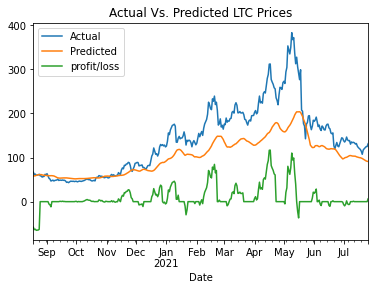

In [31]:
#display plot for presentation 
ltc_eval2 = ltc_eval.copy()

#drop next day 
ltc_eval2.drop('next_day', axis=1, inplace=True)

ltc_eval2.plot(title="Actual Vs. Predicted LTC Prices")